In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 6.0)

In [2]:
n_rounds = 10;

# Helper function to read input data
def read_input(s):
    df = pd.read_csv(s, header=None, names=['execution_time'])
    return df\
    .mask(df['execution_time'] > df['execution_time'].quantile(0.95), axis=0)

## Use case: Addition of flow

In [11]:
add_flow_baseline = pd.read_csv("./data/tmp/add_flow_BASELINE");
add_flow_sgx = pd.read_csv("./data/tmp/add_flow_SGX");
add_flow_hotcall = pd.read_csv("./data/tmp/add_flow_HOTCALL");
add_flow_optimized = pd.read_csv("./data/tmp/add_flow_OPTIMIZED");
add_flow_bundle = pd.read_csv("./data/tmp/add_flow_BATCHING");

In [4]:
add_flow_baseline.median()

38732    14683.0
dtype: float64

In [5]:
add_flow_hotcall.median()

287645    33091.0
dtype: float64

In [6]:
add_flow_optimized.median()

277939    19833.0
dtype: float64

In [7]:
add_flow_bundle.median()

297709    28096.0
dtype: float64

In [8]:
add_flow_sgx.median()

238083    239839.5
dtype: float64

In [64]:
add_flows = pd.DataFrame({
    "vanilla": [add_flow_baseline.median()[0], 
                add_flow_optimized.median()[0],
                add_flow_bundle.median()[0],
                add_flow_hotcall.median()[0],
                add_flow_sgx.median()[0]]
    #"sgx": [add_flow_sgx.median()[0]],
    #"hotcall": [add_flow_hotcall.median()[0]],
    #"opt": [add_flow_optimized.median()[0]],
    #"bundle": [add_flow_bundle.median()[0]]
}, index=["vanilla", "opt", "bundle", "hotcall", "sgx"])

Text(0.5,1,'Median excution time for adding a flow.')

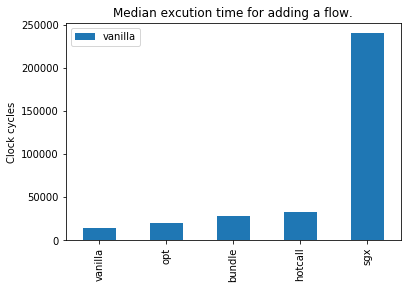

In [66]:
add_flows.plot.bar()
plt.ylabel("Clock cycles")
plt.title("Median excution time for adding a flow.")

## Use case: Deletion of flow

In [25]:
del_flow_baseline_1 = pd.read_csv("./data/tmp/del_flow_sz_1/del_flow_loose_BASELINE");
del_flow_sgx_1 = pd.read_csv("./data/tmp/del_flow_sz_1/del_flow_loose_SGX");
del_flow_hotcall_1 = pd.read_csv("./data/tmp/del_flow_sz_1/del_flow_loose_HOTCALL");
del_flow_optimized_1 = pd.read_csv("./data/tmp/del_flow_sz_1/del_flow_loose_OPTIMIZED");
del_flow_bundle_1 = pd.read_csv("./data/tmp/del_flow_sz_1/del_flow_loose_BATCHING");

del_flow_baseline_2 = pd.read_csv("./data/tmp/del_flow_loose_BASELINE_2");
del_flow_sgx_2 = pd.read_csv("./data/tmp/del_flow_loose_SGX_2");
del_flow_hotcall_2 = pd.read_csv("./data/tmp/del_flow_loose_HOTCALL_2");
del_flow_optimized_2 = pd.read_csv("./data/tmp/del_flow_loose_OPTIMIZED_2");
del_flow_bundle_2 = pd.read_csv("./data/tmp/del_flow_loose_BATCHING_2");

del_flow_baseline_4 = pd.read_csv("./data/tmp/del_flow_loose_BASELINE_4");
del_flow_sgx_4 = pd.read_csv("./data/tmp/del_flow_loose_SGX_4");
del_flow_hotcall_4 = pd.read_csv("./data/tmp/del_flow_loose_HOTCALL_4");
del_flow_optimized_4 = pd.read_csv("./data/tmp/del_flow_loose_OPTIMIZED_4");
del_flow_bundle_4 = pd.read_csv("./data/tmp/del_flow_loose_BATCHING_4");

del_flow_baseline_8 = pd.read_csv("./data/tmp/del_flow_loose_BASELINE_8");
del_flow_sgx_8 = pd.read_csv("./data/tmp/del_flow_loose_SGX_8");
del_flow_hotcall_8 = pd.read_csv("./data/tmp/del_flow_loose_HOTCALL_8");
del_flow_optimized_8 = pd.read_csv("./data/tmp/del_flow_loose_OPTIMIZED_8");
del_flow_bundle_8 = pd.read_csv("./data/tmp/del_flow_loose_BATCHING_8");

del_flow_baseline_16 = pd.read_csv("./data/tmp/del_flow_loose_BASELINE_16");
del_flow_sgx_16 = pd.read_csv("./data/tmp/del_flow_loose_SGX_8");
del_flow_hotcall_16 = pd.read_csv("./data/tmp/del_flow_loose_HOTCALL_16");
del_flow_optimized_16 = pd.read_csv("./data/tmp/del_flow_loose_OPTIMIZED_16");
del_flow_bundle_16 = pd.read_csv("./data/tmp/del_flow_loose_BATCHING_16");

In [26]:
del_flow_sgx_1.median()

164795    234747.0
dtype: float64

In [27]:
del_flow_bundle_16.median()

142160    89396.0
dtype: float64

In [28]:
del_flow_optimized_16.median()

165089    106819.0
dtype: float64

In [38]:
mod_flows = pd.DataFrame({
    "vanilla": [
        del_flow_baseline_1.median()[0], 
        del_flow_baseline_2.median()[0], 
        del_flow_baseline_4.median()[0], 
        del_flow_baseline_8.median()[0],
        del_flow_baseline_16.median()[0]
    ],
    #"sgx": [del_flow_sgx_1.median()[0], del_flow_sgx_2.median()[0], del_flow_sgx_4.median()[0], del_flow_sgx_8.median()[0]],
    "hotcall": [
        del_flow_hotcall_1.median()[0], 
        del_flow_hotcall_2.median()[0], 
        del_flow_hotcall_4.median()[0], 
        del_flow_hotcall_8.median()[0],
        del_flow_hotcall_16.median()[0]
    ],
    "opt": [
        del_flow_optimized_1.median()[0], 
        del_flow_optimized_2.median()[0], 
        del_flow_optimized_4.median()[0], 
        del_flow_optimized_8.median()[0],
        del_flow_optimized_16.median()[0]
    ],
    "bundle": [
        del_flow_bundle_1.median()[0], 
        del_flow_bundle_2.median()[0], 
        del_flow_bundle_4.median()[0], 
        del_flow_bundle_8.median()[0],
        del_flow_bundle_16.median()[0]
    ]
}, index=[1, 2, 4, 8, 16])

Text(0.5,1,'Median excution time for deleting flows.')

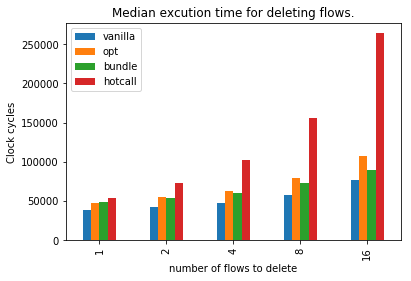

In [40]:
mod_flows[['vanilla', 'opt', 'bundle', 'hotcall']].plot.bar()
plt.xlabel("number of flows to delete")
plt.ylabel("Clock cycles")
plt.title("Median excution time for deleting flows.")

## Use case: Modification of flow

In [20]:
mod_flow_baseline_1 = pd.read_csv("./data/tmp/mod_flow_sz_1/mod_flow_loose_BASELINE_1");
mod_flow_sgx_1 = pd.read_csv("./data/tmp/mod_flow_sz_1/mod_flow_loose_SGX_1");
mod_flow_hotcall_1 = pd.read_csv("./data/tmp/mod_flow_sz_1/mod_flow_loose_HOTCALL_1");
mod_flow_optimized_1 = pd.read_csv("./data/tmp/mod_flow_sz_1/mod_flow_loose_OPTIMIZED_1");
mod_flow_bundle_1 = pd.read_csv("./data/tmp/mod_flow_sz_1/mod_flow_loose_BATCHING_1");
#mod_flow_memoize_1 = pd.read_csv("./data/tmp/mod_flow_loose_MEMOIZE_1");

mod_flow_baseline_2 = pd.read_csv("./data/tmp/mod_flow_sz_2/mod_flow_loose_BASELINE_2");
mod_flow_sgx_2 = pd.read_csv("./data/tmp/mod_flow_sz_2/mod_flow_loose_SGX_2");
mod_flow_hotcall_2 = pd.read_csv("./data/tmp/mod_flow_sz_2/mod_flow_loose_HOTCALL_2");
mod_flow_optimized_2 = pd.read_csv("./data/tmp/mod_flow_sz_2/mod_flow_loose_OPTIMIZED_2");
mod_flow_bundle_2 = pd.read_csv("./data/tmp/mod_flow_sz_2/mod_flow_loose_BATCHING_2");
#mod_flow_memoize_2 = pd.read_csv("./data/tmp/mod_flow_loose_MEMOIZE_2");

mod_flow_baseline_4 = pd.read_csv("./data/tmp/mod_flow_sz_4/mod_flow_loose_BASELINE_4");
mod_flow_sgx_4 = pd.read_csv("./data/tmp/mod_flow_sz_4/mod_flow_loose_SGX_4");
mod_flow_hotcall_4 = pd.read_csv("./data/tmp/mod_flow_sz_4/mod_flow_loose_HOTCALL_4");
mod_flow_optimized_4 = pd.read_csv("./data/tmp/mod_flow_sz_4/mod_flow_loose_OPTIMIZED_4");
mod_flow_bundle_4 = pd.read_csv("./data/tmp/mod_flow_sz_4/mod_flow_loose_BATCHING_4");
#mod_flow_memoize_4 = pd.read_csv("./data/tmp/mod_flow_loose_MEMOIZE_4");

mod_flow_baseline_8 = pd.read_csv("./data/tmp/mod_flow_sz_8/mod_flow_loose_BASELINE_8");
mod_flow_sgx_8 = pd.read_csv("./data/tmp/mod_flow_sz_8/mod_flow_loose_SGX_8");
mod_flow_hotcall_8 = pd.read_csv("./data/tmp/mod_flow_sz_8/mod_flow_loose_HOTCALL_8");
mod_flow_optimized_8 = pd.read_csv("./data/tmp/mod_flow_sz_8/mod_flow_loose_OPTIMIZED_8");
mod_flow_bundle_8 = pd.read_csv("./data/tmp/mod_flow_sz_8/mod_flow_loose_BATCHING_8");
#mod_flow_memoize_8 = pd.read_csv("./data/tmp/mod_flow_loose_MEMOIZE_8");

mod_flow_baseline_16 = pd.read_csv("./data/tmp/mod_flow_sz_16/mod_flow_loose_BASELINE_16");
mod_flow_sgx_16 = pd.read_csv("./data/tmp/mod_flow_sz_16/mod_flow_loose_SGX_16");
mod_flow_hotcall_16 = pd.read_csv("./data/tmp/mod_flow_sz_16/mod_flow_loose_HOTCALL_16");
mod_flow_optimized_16 = pd.read_csv("./data/tmp/mod_flow_sz_16/mod_flow_loose_OPTIMIZED_16");
mod_flow_bundle_16 = pd.read_csv("./data/tmp/mod_flow_sz_16/mod_flow_loose_BATCHING_16");
#mod_flow_memoize_16 = pd.read_csv("./data/tmp/mod_flow_loose_MEMOIZE_16");

In [21]:
mod_flow_sgx_1.median()

113141    264961.0
dtype: float64

In [41]:
mod_flows = pd.DataFrame({
    "vanilla": [mod_flow_baseline_1.median()[0], mod_flow_baseline_2.median()[0], mod_flow_baseline_4.median()[0], mod_flow_baseline_8.median()[0], mod_flow_baseline_16.median()[0]],
    "sgx": [mod_flow_sgx_1.median()[0], mod_flow_sgx_2.median()[0], mod_flow_sgx_4.median()[0], mod_flow_sgx_8.median()[0], mod_flow_sgx_16.median()[0]],
    "hotcall": [mod_flow_hotcall_1.median()[0], mod_flow_hotcall_2.median()[0], mod_flow_hotcall_4.median()[0], mod_flow_hotcall_8.median()[0], mod_flow_hotcall_16.median()[0]],
    "opt": [mod_flow_optimized_1.median()[0], mod_flow_optimized_2.median()[0], mod_flow_optimized_4.median()[0], mod_flow_optimized_8.median()[0], mod_flow_optimized_16.median()[0]],
    "bundle": [mod_flow_bundle_1.median()[0], mod_flow_bundle_2.median()[0], mod_flow_bundle_4.median()[0], mod_flow_bundle_8.median()[0], mod_flow_bundle_16.median()[0]],
    #"memo": [mod_flow_memoize_1.median()[0], mod_flow_memoize_2.median()[0], mod_flow_memoize_4.median()[0], mod_flow_memoize_8.median()[0], mod_flow_memoize_16.median()[0]],
}, index=[1, 2, 4, 8, 16])

Text(0.5,1,'Median excution time for modifying flows.')

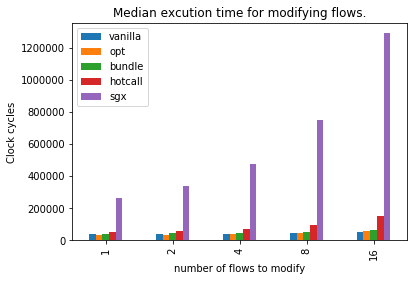

In [43]:
mod_flows[['vanilla', 'opt', 'bundle', 'hotcall', 'sgx']].plot.bar()
plt.xlabel("number of flows to modify")
plt.ylabel("Clock cycles")
plt.title("Median excution time for modifying flows.")

Text(0.5,1,'Median excution time for modifying flows.')

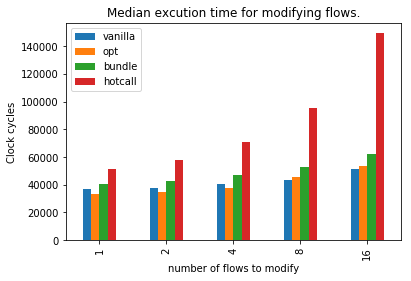

In [56]:
mod_flows[['vanilla', 'opt', 'bundle', 'hotcall']].plot.bar()
plt.xlabel("number of flows to modify")
plt.ylabel("Clock cycles")
plt.title("Median excution time for modifying flows.")

The previous graph without sgx version. 

An interesting observartion is that the optimized version is actually faster than the original when modifying 1 and 2 flows. This is a quite strange results. Possible reasons could be that the orignal version is implemented in a very non optimized way or there is some kind of bug in my optimized versions. However, all tests are passing.

## Use case: evicition

In [48]:
evict_flow_baseline_1 = pd.read_csv("./data/tmp/evict_rule_sz_1/evict_rule_batch_BASELINE_1");
evict_flow_hotcall_1 = pd.read_csv("./data/tmp/evict_rule_sz_1/evict_rule_batch_HOTCALL_1");
evict_flow_optimized_1 = pd.read_csv("./data/tmp/evict_rule_sz_1/evict_rule_batch_OPTIMIZED_1");
evict_flow_bundle_1 = pd.read_csv("./data/tmp/evict_rule_sz_1/evict_rule_batch_BATCHING_1");

evict_flow_baseline_2 = pd.read_csv("./data/tmp/evict_rule_sz_2/evict_rule_batch_BASELINE_2");
evict_flow_hotcall_2 = pd.read_csv("./data/tmp/evict_rule_sz_2/evict_rule_batch_HOTCALL_2");
evict_flow_optimized_2 = pd.read_csv("./data/tmp/evict_rule_sz_2/evict_rule_batch_OPTIMIZED_2");
evict_flow_bundle_2 = pd.read_csv("./data/tmp/evict_rule_sz_2/evict_rule_batch_BATCHING_2");

evict_flow_baseline_4 = pd.read_csv("./data/tmp/evict_rule_sz_4/evict_rule_batch_BASELINE_4");
evict_flow_hotcall_4 = pd.read_csv("./data/tmp/evict_rule_sz_4/evict_rule_batch_HOTCALL_4");
evict_flow_optimized_4 = pd.read_csv("./data/tmp/evict_rule_sz_4/evict_rule_batch_OPTIMIZED_4");
evict_flow_bundle_4 = pd.read_csv("./data/tmp/evict_rule_sz_4/evict_rule_batch_BATCHING_4");

evict_flow_baseline_8 = pd.read_csv("./data/tmp/evict_rule_sz_8/evict_rule_batch_BASELINE_8");
evict_flow_hotcall_8 = pd.read_csv("./data/tmp/evict_rule_sz_8/evict_rule_batch_HOTCALL_8");
evict_flow_optimized_8 = pd.read_csv("./data/tmp/evict_rule_sz_8/evict_rule_batch_OPTIMIZED_8");
evict_flow_bundle_8 = pd.read_csv("./data/tmp/evict_rule_sz_8/evict_rule_batch_BATCHING_8");

evict_flow_baseline_16 = pd.read_csv("./data/tmp/evict_rule_sz_16/evict_rule_batch_BASELINE_16");
evict_flow_hotcall_16 = pd.read_csv("./data/tmp/evict_rule_sz_16/evict_rule_batch_HOTCALL_16");
evict_flow_optimized_16 = pd.read_csv("./data/tmp/evict_rule_sz_16/evict_rule_batch_OPTIMIZED_16");
evict_flow_bundle_16 = pd.read_csv("./data/tmp/evict_rule_sz_16/evict_rule_batch_BATCHING_16");


In [50]:
evict_flows = pd.DataFrame({
    "vanilla": [
        evict_flow_baseline_1.median()[0], 
        evict_flow_baseline_2.median()[0], 
        evict_flow_baseline_4.median()[0], 
        evict_flow_baseline_8.median()[0],
        evict_flow_baseline_16.median()[0]
    ],
    #"sgx": [del_flow_sgx_1.median()[0], del_flow_sgx_2.median()[0], del_flow_sgx_4.median()[0], del_flow_sgx_8.median()[0]],
    "hotcall": [
        evict_flow_hotcall_1.median()[0], 
        evict_flow_hotcall_2.median()[0], 
        evict_flow_hotcall_4.median()[0], 
        evict_flow_hotcall_8.median()[0],
        evict_flow_hotcall_16.median()[0]
    ],
    "opt": [
        evict_flow_optimized_1.median()[0], 
        evict_flow_optimized_2.median()[0], 
        evict_flow_optimized_4.median()[0], 
        evict_flow_optimized_8.median()[0],
        evict_flow_optimized_16.median()[0]
    ],
    "bundle": [
        evict_flow_bundle_1.median()[0], 
        evict_flow_bundle_2.median()[0], 
        evict_flow_bundle_4.median()[0], 
        evict_flow_bundle_8.median()[0],
        evict_flow_bundle_16.median()[0]
    ]
}, index=[1, 2, 4, 8, 16])

Text(0.5,1,'Median excution time for evicting flows.')

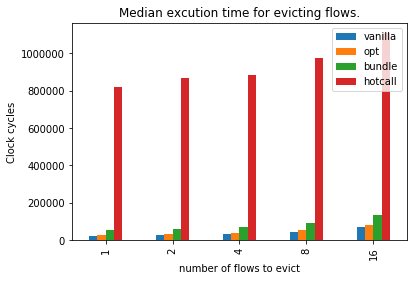

In [51]:
evict_flows[['vanilla', 'opt', 'bundle', 'hotcall']].plot.bar()
plt.xlabel("number of flows to evict")
plt.ylabel("Clock cycles")
plt.title("Median excution time for evicting flows.")

Text(0.5,1,'Median excution time for evicting flows.')

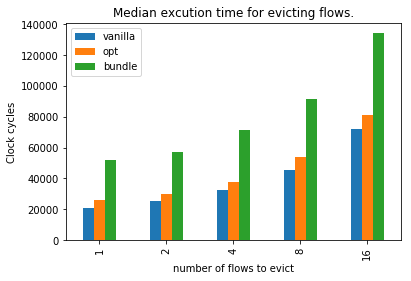

In [55]:
evict_flows[['vanilla', 'opt', 'bundle']].plot.bar()
plt.xlabel("number of flows to evict")
plt.ylabel("Clock cycles")
plt.title("Median excution time for evicting flows.")

The previous graph without hotcall version. 

## Use case: miss upcall (work in progress)

In [54]:
rt_baseline_8 = read_input("./data/tmp/udp_latency_rt_BASELINE_8");
"""
rt_baseline_32 = read_input("./data/tmp/udp_latency_rt_BASELINE_32");
rt_baseline_256 = read_input("./data/tmp/udp_latency_rt_BASELINE_256");
rt_baseline_512 = read_input("./data/tmp/udp_latency_rt_BASELINE_512");
rt_baseline_1024 = read_input("./data/tmp/udp_latency_rt_BASELINE_1024");
"""


rt_sgx_8 = read_input("./data/tmp/udp_latency_rt_SGX_8");
"""
rt_sgx_32 = read_input("./data/tmp/udp_latency_rt_SGX_32");
rt_sgx_256 = read_input("./data/tmp/udp_latency_rt_SGX_256");
rt_sgx_512 = read_input("./data/tmp/udp_latency_rt_SGX_512");
rt_sgx_1024 = read_input("./data/tmp/udp_latency_rt_SGX_1024");
"""


rt_hotcall_8 = read_input("./data/tmp/udp_latency_rt_HOTCALL_8");
"""
rt_hotcall_32 = read_input("./data/tmp/udp_latency_rt_HOTCALL_32");
rt_hotcall_256 = read_input("./data/tmp/udp_latency_rt_HOTCALL_256");
rt_hotcall_512 = read_input("./data/tmp/udp_latency_rt_HOTCALL_512");
rt_hotcall_1024 = read_input("./data/tmp/udp_latency_rt_HOTCALL_1024");
"""


rt_opt_8 = read_input("./data/tmp/udp_latency_rt_OPTIMIZED_8");
"""
rt_opt_32 = read_input("./data/tmp/udp_latency_rt_OPTIMIZED_32");
rt_opt_256 = read_input("./data/tmp/udp_latency_rt_OPTIMIZED_256");
rt_opt_512 = read_input("./data/tmp/udp_latency_rt_OPTIMIZED_512");
rt_opt_1024 = read_input("./data/tmp/udp_latency_rt_OPTIMIZED_1024");
"""

rt_bundle_8 = read_input("./data/tmp/udp_latency_rt_BATCHING_8");
"""
rt_bundle_32 = read_input("./data/tmp/udp_latency_rt_BATCHING_32");
rt_bundle_256 = read_input("./data/tmp/udp_latency_rt_BATCHING_256");
rt_bundle_512 = read_input("./data/tmp/udp_latency_rt_BATCHING_512");
rt_bundle_1024 = read_input("./data/tmp/udp_latency_rt_BATCHING_1024");
"""

IOError: [Errno 2] File ./data/tmp/udp_latency_rt_BASELINE_8 does not exist: './data/tmp/udp_latency_rt_BASELINE_8'

In [10]:
rt_baseline_8.size

299970

In [8]:
rt_baseline_8.median()

execution_time    0.000253
dtype: float64

In [9]:
rt_hotcall_8.median()

execution_time    0.000265
dtype: float64

In [11]:
rt_hotcall_8.size

299970

In [12]:
rt_opt_8.median()

execution_time    0.000264
dtype: float64

In [13]:
rt_opt_8.size

299970

In [14]:
rt_sgx_8.median()

execution_time    0.000278
dtype: float64

In [15]:
rt_bundle_8.median()

execution_time    0.000264
dtype: float64

In [53]:
rts = pd.DataFrame({
    "vanilla": [rt_baseline_8.median()[0], rt_baseline_32.median()[0], rt_baseline_256.median()[0], rt_baseline_512.median()[0], mod_flow_baseline_1024.median()[0]],
    "sgx": [mod_flow_sgx_1.median()[0], mod_flow_sgx_2.median()[0], mod_flow_sgx_4.median()[0], mod_flow_sgx_8.median()[0], mod_flow_sgx_16.median()[0]],
    "hotcall": [mod_flow_hotcall_1.median()[0], mod_flow_hotcall_2.median()[0], mod_flow_hotcall_4.median()[0], mod_flow_hotcall_8.median()[0], mod_flow_hotcall_16.median()[0]],
    "opt": [mod_flow_optimized_1.median()[0], mod_flow_optimized_2.median()[0], mod_flow_optimized_4.median()[0], mod_flow_optimized_8.median()[0], mod_flow_optimized_16.median()[0]],
    "bundle": [mod_flow_bundle_1.median()[0], mod_flow_bundle_2.median()[0], mod_flow_bundle_4.median()[0], mod_flow_bundle_8.median()[0], mod_flow_bundle_16.median()[0]],
    #"memo": [mod_flow_memoize_1.median()[0], mod_flow_memoize_2.median()[0], mod_flow_memoize_4.median()[0], mod_flow_memoize_8.median()[0], mod_flow_memoize_16.median()[0]],
})

NameError: name 'rt_baseline_8' is not defined

In [6]:
rt_baseline_8.median()

execution_time    0.00023
dtype: float64

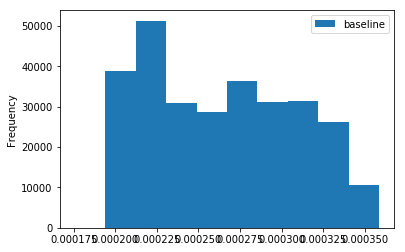

In [8]:
rt_baseline.plot.hist()

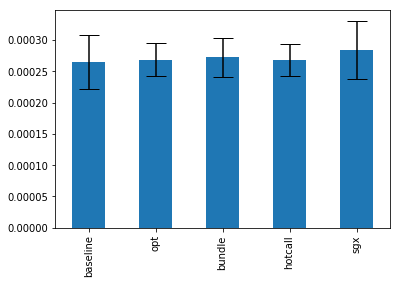

In [9]:
rt = pd.concat([rt_baseline, rt_sgx, rt_hotcall, rt_optimized, rt_bundle], axis=1, sort=False)
rt[['baseline', 'opt', 'bundle', 'hotcall', 'sgx']].mean().plot.bar(
          capsize=10, yerr=rt[['baseline', 'opt', 'bundle', 'hotcall', 'sgx']].std().tolist()
)

In [26]:
rt = pd.DataFrame({
    "vanilla": [rt_baseline],
    "sgx": [rt_sgx.median],
    "hotcall": [rt_hotcall],
    "opt": [rt_optimized],
    "bundle": [rt_bundle]
})
rt.head()

,bundle,hotcall,opt,sgx,vanilla
0,bundle 0 0.001012 1 0.00...,hotcall 0 0.001126 1 0.00...,opt 0 0.000956 1 0.00...,<bound method DataFrame.median of ...,baseline 0 0.001156 1 0.00...


In [4]:
rt_sgx.size

299999

In [5]:
rt_bundle.head()

,0.0010118484497070312
0,0.000400
1,0.000296
2,0.000279
3,0.000275
4,0.000272


In [6]:
rt_baseline.head()

,0.0011556148529052734
0,0.000399
1,0.000490
2,0.000303
3,0.000354
4,0.000257


In [28]:
rt_baseline.median()[0]

0.00027418136596679693

In [29]:
rt_sgx.median()[0]

0.0003237724304199219

In [30]:
rt_hotcall.median()[0]

0.00027036666870117193

In [31]:
rt_optimized.median()[0]

0.00026798248291015625

In [32]:
rt_bundle.median()[0]

0.00026941299438476557

In [16]:
upcall_baseline = pd.read_csv("./data/tmp/udp_latency_BASELINE_8");
upcall_sgx = pd.read_csv("./data/tmp/udp_latency_SGX_8");
upcall_hotcall = pd.read_csv("./data/tmp/udp_latency_HOTCALL_8");
upcall_optimized = pd.read_csv("./data/tmp/udp_latency_OPTIMIZED_8");
upcall_bundle = pd.read_csv("./data/tmp/udp_latency_BATCHING_8");

In [22]:
upcall_baseline.size

609377

In [17]:
upcall_baseline.median()

101104    7746.0
dtype: float64

In [18]:
upcall_hotcall.median()

117958    10254.0
dtype: float64

In [24]:
upcall_hotcall.size

608712

In [19]:
upcall_optimized.median()

121924    11042.0
dtype: float64

In [25]:
upcall_optimized.size

608443

In [20]:
upcall_bundle.median()

102912    8696.0
dtype: float64

In [21]:
upcall_sgx.median()

149996    32486.0
dtype: float64

In [4]:
upcall_baseline = pd.read_csv("./data/tmp/udp_latency_multi_rt_BASELINE_8");
upcall_sgx = pd.read_csv("./data/tmp/udp_latency_multi_rt_SGX_8");
upcall_hotcall = pd.read_csv("./data/tmp/udp_latency_multi_rt_HOTCALL_8");
upcall_optimized = pd.read_csv("./data/tmp/udp_latency_multi_rt_OPTIMIZED_8");
upcall_bundle = pd.read_csv("./data/tmp/udp_latency_multi_rt_BATCHING_8");

In [9]:
upcall_baseline.median()

0.00024819374084472656    0.00027
dtype: float64

In [11]:
upcall_sgx.median()

0.001064300537109375    0.000268
dtype: float64

In [12]:
upcall_hotcall.median()

0.0002608299255371094    0.000269
dtype: float64

In [13]:
upcall_optimized.median()

0.00025844573974609375    0.000268
dtype: float64

In [14]:
upcall_bundle.median()

0.000354766845703125    0.000269
dtype: float64